In [ ]:
!pip install langchain langgraph langchain_openai langchain_core chromadb langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.2 MB/s eta 0:00

In [ ]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict , Literal

In [ ]:
class equation_state (TypedDict) :
  a : int
  b : int
  c : int

  equation : str
  discriminant : float
  result : str

In [ ]:

def show_equation (state : equation_state) :
  show_eq = f"{state['a']}x^2 + {state['b']}x + {state['c']}"

  return {'equation' : show_eq}

def calculate_discriminant (state : equation_state) :
  discriminant = state['b']**2 - (4*state['a']*state['c'])

  return {'discriminant' : discriminant}

def no_real_roots (state : equation_state) :
  return {'result' : 'no real roots'}

def real_roots (state : equation_state) :
  root1 = -(state['b'] + (state['discriminant']**0.5)) / (2*state['a'])
  root2 = -(state['b'] - (state['discriminant']**0.5)) / (2*state['a'])

  result = f"The roots are {root1} and {root2}"

  return {'result' : result}
def repeated_root (state : equation_state) :
  root = -state['b'] / (2*state['a'])

  result = f"The root is {root}"

  return {'result' : result}

In [ ]:
def conditional_switch (state : equation_state) -> Literal["real_roots" , "no_real_roots" , 'repeated_root']:
  if state['discriminant'] < 0 :
    return "no_real_roots"
  elif state['discriminant'] > 0 :
    return "real_roots"
  else :
    return "repeated_root"

In [ ]:
graph = StateGraph(equation_state)

In [ ]:
graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('no_real_roots',no_real_roots)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_root',repeated_root)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', conditional_switch)
graph.add_edge('no_real_roots', END)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_root', END)

In [ ]:
workflow = graph.compile()

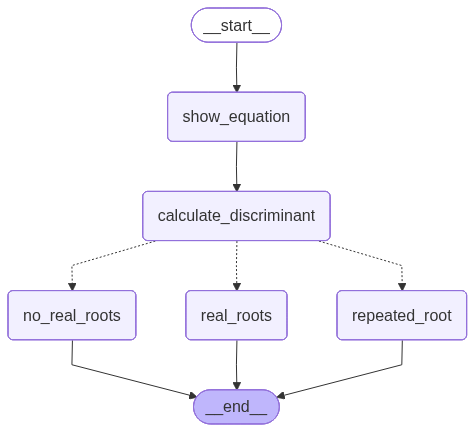

In [ ]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
workflow.invoke({'a':2 , 'b': 4 , 'c' : 2})

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x^2 + 4x + 2',
 'discriminant': 0,
 'result': 'The root is -1.0'}

# Review Reply Workflow

In [ ]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict , Literal
from pydantic import BaseModel , Field
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')


In [ ]:
llm_model = ChatOpenAI(model = 'gpt-3.5-turbo')
parser = StrOutputParser()

In [ ]:
class Sentiment_Analysis (BaseModel) :
  sentiment : Literal['Positive' , 'Negative'] = Field(description = 'The sentiment of the review')

In [ ]:
Str_sentiment_output = llm_model.with_structured_output(Sentiment_Analysis)

/usr/local/lib/python3.12/dist-packages/langchain_openai/chat_models/base.py:1927: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


In [ ]:
Str_sentiment_output

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x79211f4ac2c0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x79211f25a720>, root_client=<openai.OpenAI object at 0x79211f576cc0>, root_async_client=<openai.AsyncOpenAI object at 0x79211fa69700>, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'Sentiment_Analysis', 'description': '', 'parameters': {'properties': {'sentiment': {'description': 'The sentiment of the review', 'enum': ['Positive', 'Negative'], 'type': 'string'}}, 'required': ['sentiment'], 'type': 'object'}}}], 'ls_structured_output_format': {'kwargs': {'method': 'function_calling', 'strict': None}, 'schema': <class '__main__.Sentiment_Analysis'>}, 'parallel_tool_calls': False, 'tool_choice': {'type': 'function', 'function': {'name': 'Sentiment_Analysis'}}}, config={}, config_factories=[])
| PydanticTools

In [ ]:
Str_sentiment_output.invoke("Terrible smartphone")

Sentiment_Analysis(sentiment='Negative')

In [ ]:
class Diagnosis (BaseModel) :
  issue_type : Literal["UX", "Performance", "Bug", "Support", "Other"] = Field (description= "The category of issue mentioned in the review")
  tone : Literal ["angry", "frustrated", "disappointed", "calm"]  = Field (description= "The emotional tone expressed by the user")
  urgency : Literal ["low", "medium", "high"] = Field (description= "How urgent or critical the issue appears to be")

In [ ]:
Str_Diagnosis_output = llm_model.with_structured_output(Diagnosis)

/usr/local/lib/python3.12/dist-packages/langchain_openai/chat_models/base.py:1927: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


In [ ]:
Str_Diagnosis_output.invoke("I am waiting for the update for a days the app geting worse and worse")

Diagnosis(issue_type='Bug', tone='frustrated', urgency='high')

In [ ]:
class ReviewState (TypedDict) :
  review : str
  sentiment : Literal ['Positive' , 'Negative']
  diagnosis : dict
  response : str

In [ ]:
def find_sentiment (state : ReviewState) :
  prompt = f"What is the sentiment of this review? {state['review']}"
  sentiment = Str_sentiment_output.invoke(prompt)
  return {'sentiment' : sentiment}

def run_diagnosis (state : ReviewState) :
  prompt = f"Diagnose the negatice review :\n\n {state['review']} \n return the issue-type, tone, and urgency"
  diagnosis = Str_Diagnosis_output.invoke(prompt)
  return {'diagnosis' : diagnosis.model_dump()}  # convert Pydantic object → dict.

def positive_response (state : ReviewState) :
  prompt = f"Base on the positive review {state['review']} generate the positove response and ask the user to leave a feedback"
  response = llm_model.invoke(prompt).content
  return {'response' : response}

def Negative_response (state : ReviewState) :
  diagnosis = state['diagnosis']
  prompt = f"""You are the support assistant.
  Base on the user review {state['review']} and the problem user facing {diagnosis['issue_type']} issue, sounded '{diagnosis['tone']}', and marked urgency as '{diagnosis['urgency']}'.
Write an empathetic, helpful resolution message."""
  response = llm_model.invoke(prompt).content
  return {'response' : response}


def check_sentiment(state: ReviewState) -> Literal["positive_response", "run_diagnosis"]:

    if state['sentiment'] == 'Positive':
        return 'positive_response'
    else:
        return 'run_diagnosis'

In [ ]:
graph = StateGraph(ReviewState)

In [ ]:
graph = StateGraph(ReviewState)

graph.add_node('find_sentiment', find_sentiment)
graph.add_node('positive_response', positive_response)
graph.add_node('run_diagnosis', run_diagnosis)
graph.add_node('negative_response', Negative_response)

graph.add_edge(START, 'find_sentiment')

graph.add_conditional_edges('find_sentiment', check_sentiment)

graph.add_edge('positive_response', END)

graph.add_edge('run_diagnosis', 'negative_response')
graph.add_edge('negative_response', END)

workflow = graph.compile()

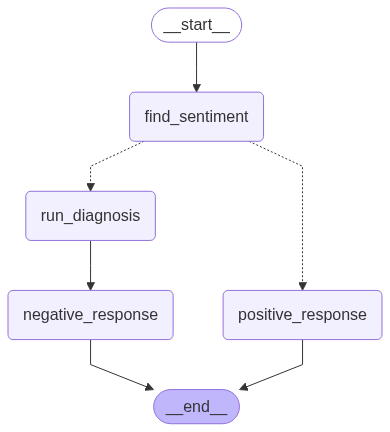

In [ ]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
intial_state={
    'review': "I’ve been trying to log in for over an hour now, and the app keeps freezing on the authentication screen. I even tried reinstalling it, but no luck. This kind of bug is unacceptable, especially when it affects basic functionality."
}
workflow.invoke(intial_state)

{'review': 'I’ve been trying to log in for over an hour now, and the app keeps freezing on the authentication screen. I even tried reinstalling it, but no luck. This kind of bug is unacceptable, especially when it affects basic functionality.',
 'sentiment': Sentiment_Analysis(sentiment='Negative'),
 'diagnosis': {'issue_type': 'Bug', 'tone': 'frustrated', 'urgency': 'high'},
 'response': "I'm sorry to hear about the trouble you've been experiencing with the app. I completely understand how frustrating it must be to not be able to log in after trying for so long. Please know that we take issues like this very seriously and are working diligently to resolve it as quickly as possible.\n\nIn the meantime, have you tried clearing the app's cache or trying to log in from a different device? Sometimes these simple steps can help resolve authentication issues. If that doesn't work, our tech team is actively investigating the bug and we hope to have a fix in place soon.\n\nThank you for your p

# Building a RAG with LLM Conditional PipeLine

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_core.prompts import PromptTemplate , ChatPromptTemplate
from langchain.document_loaders import DirectoryLoader , TextLoader
from langchain_openai import ChatOpenAI , OpenAIEmbeddings
from langgraph.graph import StateGraph , END , START
from typing import TypedDict
from langchain_core.runnables import RunnablePassthrough
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
import operator
from pydantic import BaseModel , Field
from langchain_core.messages import BaseMessage


In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
llm_model = ChatOpenAI(model_name='gpt-3.5-turbo')
embedding_model = OpenAIEmbeddings()
parser = StrOutputParser()

In [ ]:
loader_2 = DirectoryLoader('/content/langchain', glob="**/*.txt", loader_cls=TextLoader)
document = loader_2.load()

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=200)
texts = text_splitter.split_documents(document)

In [ ]:
vectorstore = Chroma.from_documents(texts, embedding_model)
retriver = vectorstore.as_retriever(search_type = 'similarity' , search_kwargs={'k':3})

In [ ]:
query = "what is langchain"
docs = retriver.get_relevant_documents(query)

/tmp/ipython-input-1103720295.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriver.get_relevant_documents(query)


In [ ]:
for i , doc in enumerate(docs) :
  print(f"Document {i} \n")
  print(doc.page_content)

Document 0 

LangChain

What it is:
LangChain is a framework that helps you build applications using Large Language Models (LLMs) like GPT, Gemini, Claude, Groq, etc.
Instead of just sending text to the LLM and getting plain text back, LangChain helps you connect the LLM with tools, memory, structured outputs, and workflows.

Key Features:

Chains: You can connect multiple steps together (e.g., ask LLM → search the web → summarize the result).

Memory: Lets your chatbot or agent remember previous conversations.

Tools & Plugins: You can add external tools like search engines, databases, APIs.

Structured Output: Convert messy LLM text into JSON, Pydantic objects, or clean formats.

Agents: Let the LLM “decide” what tool to use step by step.

Use Cases:

Chatbots with memory.
Document 1 

LangSmith → The monitoring, debugging, and evaluation tool to improve and deploy these apps.

👉 Together:
You build with LangChain → orchestrate with LangGraph → evaluate/debug with LangSmith.

Would y

In [ ]:
class TopicSelectionParser(BaseModel) :
  topic : str = Field(description="Selected topic")
  Reasoning: str = Field(description='Reasoning behind topic selection')

In [ ]:
str_output = llm_model.with_structured_output(TopicSelectionParser)

/usr/local/lib/python3.12/dist-packages/langchain_openai/chat_models/base.py:1927: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


In [ ]:
class LLM_OR_RAG (TypedDict):
  query : str
  answer : str
  message : Annotated[Sequence[BaseMessage] , operator.add]

In [ ]:
def topic_chose (state : LLM_OR_RAG) :
  question = state['message'][-1]
  print(question)
  template="""
    Your task is to classify the given user query into one of the following categories: [Langchain, Langsmith, langgraph, Not Related].
    Only respond with the category name and nothing else.

    User query: {question}
    """
  prompt = PromptTemplate(
      template=template,
      input_variables=["question"],


  )
  chain = prompt | llm_model | parser
  response = chain.invoke({'question':question})
  print(response)
  return {"query": question ,'message' : [response]}

In [ ]:
def condition_trigger (state : LLM_OR_RAG) :
  last_message =  state['message'][-1]

  print(last_message)

  if any(x in last_message for x in ["Langchain", "Langsmith", "Langgraph"]):
      return "RAG Call"
  else:
      return "LLM Call"


In [ ]:
def LLM_Response (state : LLM_OR_RAG) :
  print("LLM")
  question = state["query"]
  prompt = f"Your task is to provide the  asnwer on the user query. Following is the query {question} "

  result = llm_model.invoke(prompt)

  return {'answer' : result.content }

In [ ]:
def RAG_Response (state: LLM_OR_RAG) :
  print("RAG")
  question = state['query']
  template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
  prompt = ChatPromptTemplate.from_template(template)

  retriever_chain = (
        {"context": retriver, "question": RunnablePassthrough()}
        | prompt
        | llm_model
        | parser
        )
  result  = retriever_chain.invoke(question)
  return {"answer": result}

In [ ]:
workflow5 = StateGraph(LLM_OR_RAG)

In [ ]:
workflow5.add_node("agent", topic_chose)

workflow5.add_node("RAG", RAG_Response)

workflow5.add_node("LLM", LLM_Response)


workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",


    condition_trigger ,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    },
)

workflow5.add_edge("RAG",END)


workflow5.add_edge("LLM",END)

In [ ]:
app5=workflow5.compile()

In [ ]:
inputs = {"message": [ "Tell me about langchain"]}
output = app5.invoke(inputs)
print(output)


Tell me about langchain


OutputParserException: Invalid json output: Langchain
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 